In [1]:
from zipfile import ZipFile
file_name = "Flowers.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(r"/content/flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [6]:
x_test=test_datagen.flow_from_directory(r"/content/flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [7]:
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [9]:
model=Sequential()

In [10]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(300,activation='relu'))

In [14]:
model.add(Dense(5,activation="softmax"))

In [15]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [16]:
len(x_train)

180

In [17]:
model.fit(x_train,epochs=5,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/5
180/180 [==============================] - 54s 298ms/step - loss: 1.3220 - accuracy: 0.4668 - val_loss: 1.2061 - val_accuracy: 0.5122
Epoch 2/5
180/180 [==============================] - 53s 295ms/step - loss: 1.0653 - accuracy: 0.5786 - val_loss: 0.9477 - val_accuracy: 0.6356
Epoch 3/5
180/180 [==============================] - 53s 294ms/step - loss: 0.9784 - accuracy: 0.6199 - val_loss: 0.9267 - val_accuracy: 0.6384
Epoch 4/5
180/180 [==============================] - 52s 290ms/step - loss: 0.9117 - accuracy: 0.6414 - val_loss: 0.9106 - val_accuracy: 0.6599
Epoch 5/5
180/180 [==============================] - 53s 292ms/step - loss: 0.8814 - accuracy: 0.6555 - val_loss: 0.9323 - val_accuracy: 0.6521


In [18]:
model.save("dandelion.h5")

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [20]:
model=load_model("/content/daisy.h5")

In [21]:
img=image.load_img("/content/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg",target_size=(64,64))

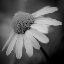

In [22]:
img

In [23]:
x=image.img_to_array(img)

In [24]:
x

array([[[25., 25., 25.],
        [29., 29., 29.],
        [34., 34., 34.],
        ...,
        [32., 32., 32.],
        [31., 31., 31.],
        [31., 31., 31.]],

       [[26., 26., 26.],
        [30., 30., 30.],
        [35., 35., 35.],
        ...,
        [34., 34., 34.],
        [33., 33., 33.],
        [32., 32., 32.]],

       [[27., 27., 27.],
        [31., 31., 31.],
        [35., 35., 35.],
        ...,
        [34., 34., 34.],
        [35., 35., 35.],
        [34., 34., 34.]],

       ...,

       [[17., 17., 17.],
        [19., 19., 19.],
        [22., 22., 22.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[16., 16., 16.],
        [18., 18., 18.],
        [22., 22., 22.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[16., 16., 16.],
        [18., 18., 18.],
        [21., 21., 21.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]

In [25]:
x.ndim

3

In [26]:
x=np.expand_dims(x,axis=0)

In [27]:
x.ndim

4

In [28]:
pred=model.predict(x)


In [29]:
pred

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [30]:
labels=["daisy","dandelion","rose","sunflower","tulip"]

In [31]:
np.argmax(pred)

0

In [32]:
labels[2]

'rose'

In [33]:
labels[np.argmax(pred)]

'daisy'